Validation MSE: 1191.31
Test MSE: 1280.92
train MSE = 255.21
validation MSE = 1191.31
test MSE = 1280.92


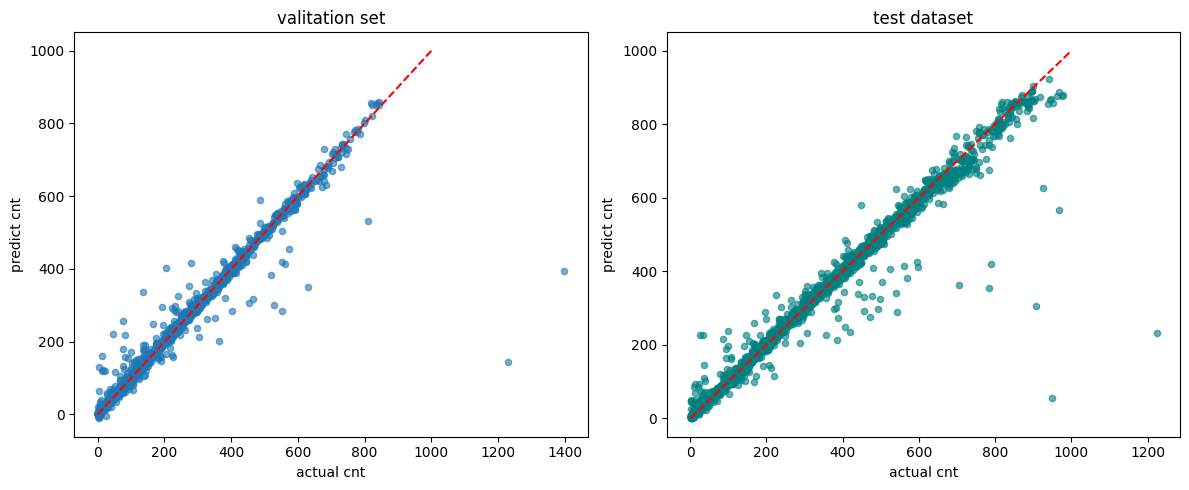

In [4]:
#MGMT 687 HW1 Q3 - Non-interpretable Model Regression - Lichen Mao

#(a) XGBoost Regression

#step1 import the required libary for XGBoost, then name train/test dataset
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
# name dataset
train_val_df = pd.read_csv("Hour_train_validate.csv")
test_df = pd.read_csv("Hour_test.csv")

#step2. set the target result and split the data for training, validation and testing
target_col = "cnt"
#drop off target and 'dteday' column which is not numerical
X = train_val_df.drop(columns=[target_col, 'dteday'])
y = train_val_df[target_col]
#define test dataset
X_test = test_df.drop(columns=[target_col, 'dteday'])
y_test = test_df[target_col]
#split data
X_train, X_val, y_train, y_val = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)

# Handle NaN values in y_train by dropping corresponding rows
nan_in_y_train = y_train.isnull()
X_train = X_train[~nan_in_y_train]
y_train = y_train[~nan_in_y_train]

# Check for NaN values in y_test and y_val for robustness, though the error was in y_train
nan_in_y_val = y_val.isnull()
X_val = X_val[~nan_in_y_val]
y_val = y_val[~nan_in_y_val]

nan_in_y_test = y_test.isnull()
X_test = X_test[~nan_in_y_test]
y_test = y_test[~nan_in_y_test]

#step3. input XGBoost regression parameter, then make regression model.
#In my case, I tried several parameter combos, and the best one is a slightly overfitted model. I am using this combo below:
xgb_model = XGBRegressor(
    #mid level of tree amount
    n_estimators=300,
    #mid depth to avoid too much overfit
    max_depth=5,
    #moderate learning rate, smoothly change on coefficient but no take too much time on train
    learning_rate=0.05,
    #randong sampling for each tree and get the characteristic of tree in mid level
    subsample=0.8,
    colsample_bytree=0.8,
    #L1&L2 regularization keep default
    reg_lambda=1.0,
    reg_alpha=0.0,
    # use 26 as random seed for this year is 2026
    random_state=26
)
#train the model
xgb_model.fit(X_train, y_train)

#step4.calculate MSE and evaluation on validation and test set
#validation set
val_pred = xgb_model.predict(X_val)
val_mse = mean_squared_error(y_val, val_pred)
print(f"Validation MSE: {val_mse:.2f}")
#test set
test_pred = xgb_model.predict(X_test)
test_mse = mean_squared_error(y_test, test_pred)
print(f"Test MSE: {test_mse:.2f}")

#Step6. visiualzation
# name print_mse to calculate the MSE
def print_mse(name, X, y):
    y_pred = xgb_model.predict(X)
    mse = mean_squared_error(y, y_pred)
    print(f"{name} MSE = {mse:.2f}")
    return mse

import matplotlib.pyplot as plt
#show the mse for each dataset
train_mse = print_mse("train", X_train, y_train)
val_mse   = print_mse("validation", X_val,   y_val)
test_mse  = print_mse("test", X_test,  y_test)
# draw the figure to show the difference of actual and predict in validataion dataset and test dataset
plt.figure(figsize=(12, 5))
# fig.1 validation set
plt.subplot(1, 2, 1)
plt.scatter(y_val, xgb_model.predict(X_val), alpha=0.6, s=20)
plt.plot([0, 1000], [0, 1000], 'r--')
plt.xlabel('actual cnt')
plt.ylabel('predict cnt')
plt.title('valitation set')
# fig.2 test set
plt.subplot(1, 2, 2)
plt.scatter(y_test, xgb_model.predict(X_test), alpha=0.6, s=20, color='teal')
plt.plot([0, 1000], [0, 1000], 'r--')
plt.xlabel('actual cnt')
plt.ylabel('predict cnt')
plt.title('test dataset')
plt.tight_layout()
plt.show()

(b) I cannot interpret this model.
The XGBoost model is a non-interpretable model because the machine-learning process treats the data in a complex way. It usually does not rely on a single explicit mathematical equation, which makes it difficult to interpret.

XGBoost grows many trees (which means running regression multiple times individually; in my case, n_estimators = 300, so it runs 300 times). The final prediction comes from the combination of the outputs from all trees. As a result, in theory, we could “read” how the final prediction is made if there is enough time, but it is very hard to interpret how and why an individual predictor contributes to the result, unlike a linear regression model.

(c) Compared to Q1, the accuracy improved significantly. We use test MSE to evaluate the performance. The test MSE in Q1 is 21,469.7, while the test MSE in Q2 is 1,280.92, which means the MSE decreased by about 94%.

This is because the relationship between bike rental amounts and the predictors is obviously not linear, which makes linear models too restrictive for real-world data. On the other hand, XGBoost, as a non-interpretable method, can capture non-linear relationships and complex interactions between predictors, such as how weather conditions relate to time and season. In linear models, these interactions often lead to multicollinearity, which is difficult to eliminate.

(d)

For linear models:

Advantages:

Interpretability. The model provides clear coefficients, which directly show the contribution of each predictor.

Easy computation. Linear regression is simple and fast to compute, and it is relatively stable when the sample size is small.


Disadvantages:

Strong reliance on assumptions. The model heavily relies on linearity assumptions, such as no multicollinearity or confounding. In real-world data, these assumptions are hard to fully satisfy, which can lead to low accuracy.

Limited flexibility. The model can only capture linear relationships, while the true relationships in the dataset may be non-linear.


For non-interpretable models:

Advantages:

High precision. These models can capture relationships more accurately, and their predictive performance can be much stronger with advanced algorithms.

Wide applicability. Unlike linear models, non-interpretable models can work well on most datasets regardless of the underlying relationships, which is very useful for complex business data.


Disadvantages:

Hard or impossible to interpret. Since the prediction is based on the combined results of many trees, it is difficult to determine which factors have the most significant effects.

Expensive computation. The time required to train these models is significantly longer than that of linear regression.
